Processed image saved at: /home/asal/svf/mole.png
Sky View Factor (SVF): 0.258


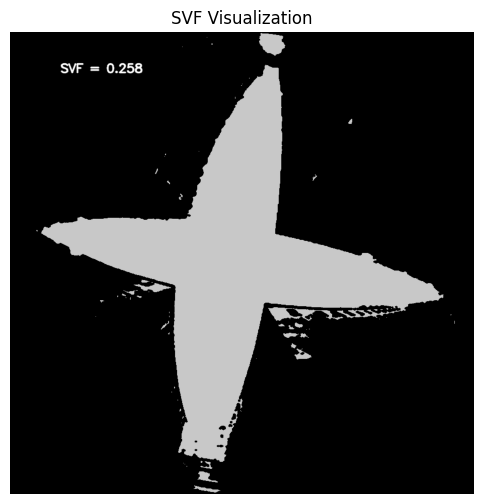

SVF visualization saved at: ./svf_visualized_image.png


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the fisheye image
image_path = "/home/asal/svf/image (5).png"# Update with your fisheye image path
image = cv2.imread(image_path)

# Step 1: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply intensity-based thresholding (adaptive or global)
_, intensity_mask = cv2.threshold(gray, 180, 200, cv2.THRESH_BINARY)

# Step 3: Apply Canny edge detection to highlight boundaries
edges = cv2.Canny(gray, 50, 220)

# Step 4: Combine intensity mask and edge detection
combined_mask = cv2.bitwise_and(intensity_mask, cv2.bitwise_not(edges))

# Step 5: Create a circular mask for the fisheye region
height, width = combined_mask.shape
center = (width // 2, height // 2)
radius = min(center)

y, x = np.ogrid[:height, :width]
circular_mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

# Apply the circular mask to the combined mask
combined_mask[~circular_mask] = 0

# Step 6: Clean up noise using morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)

# Save and visualize the result
processed_image_path = "/home/asal/svf/mole.png"
cv2.imwrite(processed_image_path, cleaned_mask)

# # Visualize the result
# plt.figure(figsize=(6, 6))
# plt.imshow(cleaned_mask, cmap='gray')
# plt.title(" Segmentation Result")
# plt.axis("off")
# plt.show()

# Output the processed image path
print(f"Processed image saved at: {processed_image_path}")

# Step 7: Calculate SVF

# Calculate the total area of the circular fisheye region
total_pixels = np.sum(circular_mask)  # Count pixels within the circular mask

# Calculate the sky area (white pixels in the cleaned mask)
sky_pixels = np.sum(cleaned_mask > 0)  # Count non-zero pixels (white)

# Calculate the Sky View Factor
svf = sky_pixels / total_pixels

# Output the SVF result
print(f"Sky View Factor (SVF): {svf:.3f}")

# Step 8: Visualize the SVF on the processed image
# Convert the binary mask to a color image for visualization
overlay_image = cv2.cvtColor(cleaned_mask, cv2.COLOR_GRAY2BGR)
font = cv2.FONT_HERSHEY_SIMPLEX

# Add SVF value as text on the image
cv2.putText(overlay_image, f"SVF = {svf:.3f}", (100, 80), font,0.8, (255, 255, 255), 2, cv2.LINE_AA)

# Save and visualize the image with SVF value
output_image_path = "./svf_visualized_image.png"
cv2.imwrite(output_image_path, overlay_image)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
plt.title("SVF Visualization")
plt.axis("off")
plt.show()

print(f"SVF visualization saved at: {output_image_path}")
